In [1]:
#%matplotlib inline

In [2]:
import pandas as pd
# pretty printing of pandas dataframe
pd.set_option('expand_frame_repr', False)
pd.set_option("display.max_rows", None, "display.max_columns", None)

# There are 4 tables on the Wikipedia page
# we want the last table

payload=pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')
first_table  = payload[0]
second_table = payload[1]
third_table  = payload[2]
fourth_table = payload[4]

tickers = fourth_table
tickers['Ticker'][0:5]

0    ATVI
1    ADBE
2     ADP
3    ABNB
4    ALGN
Name: Ticker, dtype: object

In [38]:
import mplfinance as mpf
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import os

data_output_dir='dataset//'

for i in range(len(tickers)):
    ticker = yf.Ticker(tickers['Ticker'][i])

    # Get the historical market data for the ticker
    df = ticker.history(period="60d", interval='5m') #start='2020-01-23', end='2020-02-23')

    mini_window_size = 100 #day's 27 candles/2
    total_window_size = len(df) #how many data points do you have so it knows where to stop (think full chart)

    for ii in range(total_window_size-mini_window_size+1):
        df_day = df.iloc[:, : 4]
        candle_df = df_day[ii:mini_window_size+ii]
        
        #min max norm
        min_price = candle_df.min().min()
        max_price = candle_df.max().max()
        range_price = max_price - min_price
        # normalize the data
        candle_df = (candle_df - min_price) / range_price

        mul = 100 #max pixles per candle
        r = 5 #sig figs to round
        step = 1 #steps between each candle
        counter = list(range(0,len(candle_df)*step,step))

        tails_channel = np.zeros((mul,len(counter)*step))
        green_channel = np.zeros((mul,len(counter)*step))
        red_channel   = np.zeros((mul,len(counter)*step))

        color=1

        for iii in range(len(counter)):
            Low = int(round(candle_df['Low'][iii],r)*mul)
            Close = int(round(candle_df['Close'][iii],r)*mul)
            Open = int(round(candle_df['Open'][iii],r)*mul)
            High = int(round(candle_df['High'][iii],r)*mul)

            if  Close > Open: #Green candle
                tails_channel[Low:Open,counter[iii]]   = color
                green_channel[Open:Close,counter[iii]] = color
                tails_channel[Close:High,counter[iii]] = color
            else: #Red candle
                tails_channel[Low:Close,counter[iii]] = color
                red_channel[Close:Open,counter[iii]]  = color
                tails_channel[Open:High,counter[iii]] = color
        vic_name = (str(i)+'-'+str(ii))
        Z = [np.flip(red_channel,axis=0), np.flip(green_channel,axis=0), np.flip(tails_channel,axis=0)]
        if not os.path.exists(data_output_dir):os.mkdir(data_output_dir) 
        np.save(data_output_dir+vic_name,Z)
    print(len(Z[0]),len(Z[0][0]))
#         print(i)
#     plt.figure(figsize = (10,10)) # create a 10 x 10 figure 
#     im = plt.imshow(np.dstack(Z), interpolation='none', aspect='auto')

KeyboardInterrupt: 

In [32]:
len(Z[0][0])

104

In [30]:
dataset = torch.tensor(np.asarray([np.load(data_input_dir+'0-'+'0'+'.npy')]),dtype=torch.float)
print(dataset.shape)

torch.Size([1, 3, 100, 104])


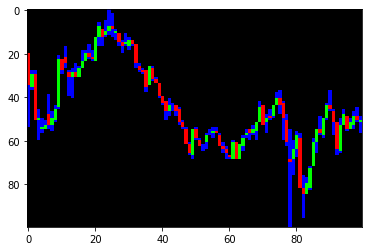

In [35]:
im = plt.imshow(np.dstack(Z), interpolation='none', aspect='auto')